# Text message Project

## importing the dataset and libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplt
from wordcloud import WordCloud

In [41]:
df = pd.read_csv('clean_nus_sms.csv', index_col=0)

In [42]:
df

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4
5,10125,m walking in citylink now ü faster come down.....,65,SG,2003/4
6,10126,5 nights...We nt staying at port step liao...T...,51,SG,2003/4
7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,SG,2003/4
8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,SG,2003/4
9,10129,Hey tmr maybe can meet you at yck,33,SG,2003/4


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
id         48598 non-null int64
Message    48595 non-null object
length     48598 non-null object
country    48598 non-null object
Date       48598 non-null object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [44]:
df.describe()

,id
count,48598.000000
mean,21106.315342
std,12189.313543
min,1.000000
25%,12100.000000
50%,18553.000000
75%,29964.500000
max,45718.000000


# Preprocessing

## Check for empty messagges

In [45]:
df['Message'].isnull().values.any()

True

In [46]:
df['Message'].isnull().sum()

3

In [47]:
df = df.dropna()
len(df)

48595

## Lower case

In [48]:
df["Message_clean"] = df["Message"].str.lower()
df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


## Removing punctuation

In [49]:
df["Message_clean"] = df["Message_clean"].str.replace('[^\w\s]','')
df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


## Removing stopwords or not?

In [50]:
import nltk
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [51]:
df.Message_clean[2]

'i dunno until when lets go learn pilates'

Even it is a common practice to remove stopwords, the amount of charcters is too poor that everything could be important. So, I chose to not do that

## Removing the URLs

importing regular expressions

In [52]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [53]:
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))

df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


## Removing the HTMLs

In [54]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [55]:
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
# View changes
df.head()

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


## Tokenizing Message_clean and preparing for sentiment analysis

In [56]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /Users/nicolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [57]:
# Save the preprocessed DataFrame
df.to_csv('second_cleaned_sms.csv', header = True)

# Data Visualization

(-0.5, 999.5, 499.5, -0.5)

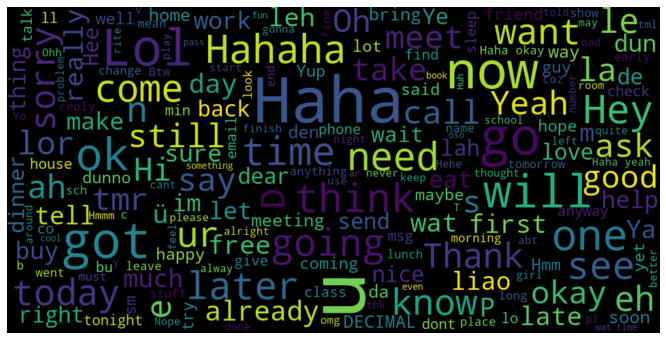

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline

words = ' '.join([word for word in df['Message']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')


## Counting the unique number of countries

In [59]:
df['country'].nunique()

40

In [60]:
df.columns

Index(['id', 'Message', 'length', 'country', 'Date', 'Message_clean',
       'Message_tokenized'],
      dtype='object')

## Listing all the countries

In [61]:
df['country'].value_counts()

Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Lebanon                   10
Turkey                    10
Slovenia                  10
Italia                    10
Trinidad and Tobago       10
Nigeria                   10
New Zealand               10
UK                        10
Macedonia                 10
Australia                  9
Romania                    9
Morocco       

## Fixing some repetitions on the country column

In [62]:
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})

df['country'].nunique()

33

In [63]:


data = df['country']

(array([4.042e+04, 6.480e+03, 6.700e+01, 1.159e+03, 2.030e+02, 4.900e+01,
        7.600e+01, 5.800e+01, 4.600e+01, 3.700e+01]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

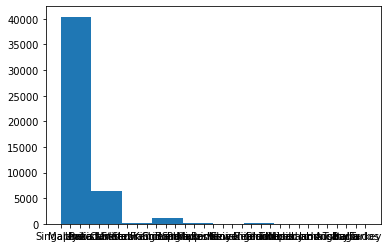

In [64]:
plt.hist(data)

<AxesSubplot:>

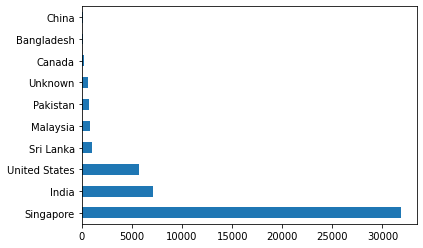

In [65]:
# Number of messages per country
country_value_counts = df['country'].value_counts() 

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# Plot a bar chart using pandas built-in plotting apis
top_10_country_value_counts.plot.barh() 

Singapore, India and United States have most of the messages

# Sentiment Analysis

I am going to use NLTK libraries to categorize in positive or negative

Then I will use a Naive Bayes or other algorithms to determine the sentiment of the messages

In [66]:
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/nicolo/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicolo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nicolo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Importing the twitter data

In [67]:
from nltk.corpus import twitter_samples

Instantiate positive and negative twitts

In [68]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [69]:
# View first negative tweet
print(negative_tweets[0])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

hopeless for tmr :(
There are 5000 negative tweets.


## Tokenizing the twitts

In [70]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[1])

# Create tokens from the positive tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[1])

['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!']
['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':(']


Removing Urls and Htmls for tweets as well

In [71]:
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

In [72]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130084

In [73]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

22689
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

Identify when a feature is present in a message 

In [74]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
test_sentence = "Venice is a funny place to live in :)".split(" ")
print(document_features(test_sentence, sentiment_features))

{':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': True, 'you': False, 'the': False, '': False, ',': False, 'a': True, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': True, 'is': True, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': Fa

Randomizing and splitting the dataset for the train

In [75]:
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

In [76]:
# Import classify and sentiment analysis model
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data (this will take awhile)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9966666666666667
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

testing the model first 

In [77]:

sample_message = str(df["Message_tokenized"][49])
print(sample_message)


print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


evaluating all the messages 

In [78]:

sentiments = []


for message in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))


df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Negative    31228
Positive    17367
Name: Sentiment, dtype: int64

ratio 

In [79]:
df['Sentiment'].value_counts(normalize = True)

Negative    0.642618
Positive    0.357382
Name: Sentiment, dtype: float64

visualizing 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

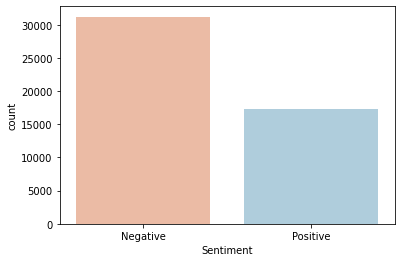

In [80]:
sns.countplot(x='Sentiment', data=df, palette='RdBu')

Converting my sentiment into a numerical variable and comparing by country

In [81]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

#check 
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


average sentiment for each country

In [82]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = df.groupby(['country']).mean()

#reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,country,id,Sentiment_score
0,Australia,45574.666667,0.111111
1,Bangladesh,39876.301587,-0.190476
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.252525
4,China,12499.878505,-0.177570


sorting the values 

In [83]:
df_sent.sort_values(by='Sentiment_score') 

,country,id,Sentiment_score
13,Lebanon,41975.500000,-1.000000
2,Barbados,45633.500000,-1.000000
19,Nigeria,41682.500000,-0.600000
25,Slovenia,41282.500000,-0.600000
29,Turkey,45643.500000,-0.600000
22,Romania,41232.000000,-0.555556
11,Jamaica,45285.250000,-0.500000
10,Italia,45593.500000,-0.400000
24,Singapore,23200.872835,-0.378131
21,Philippines,39688.328358,-0.283582


<AxesSubplot:xlabel='country', ylabel='Sentiment_score'>

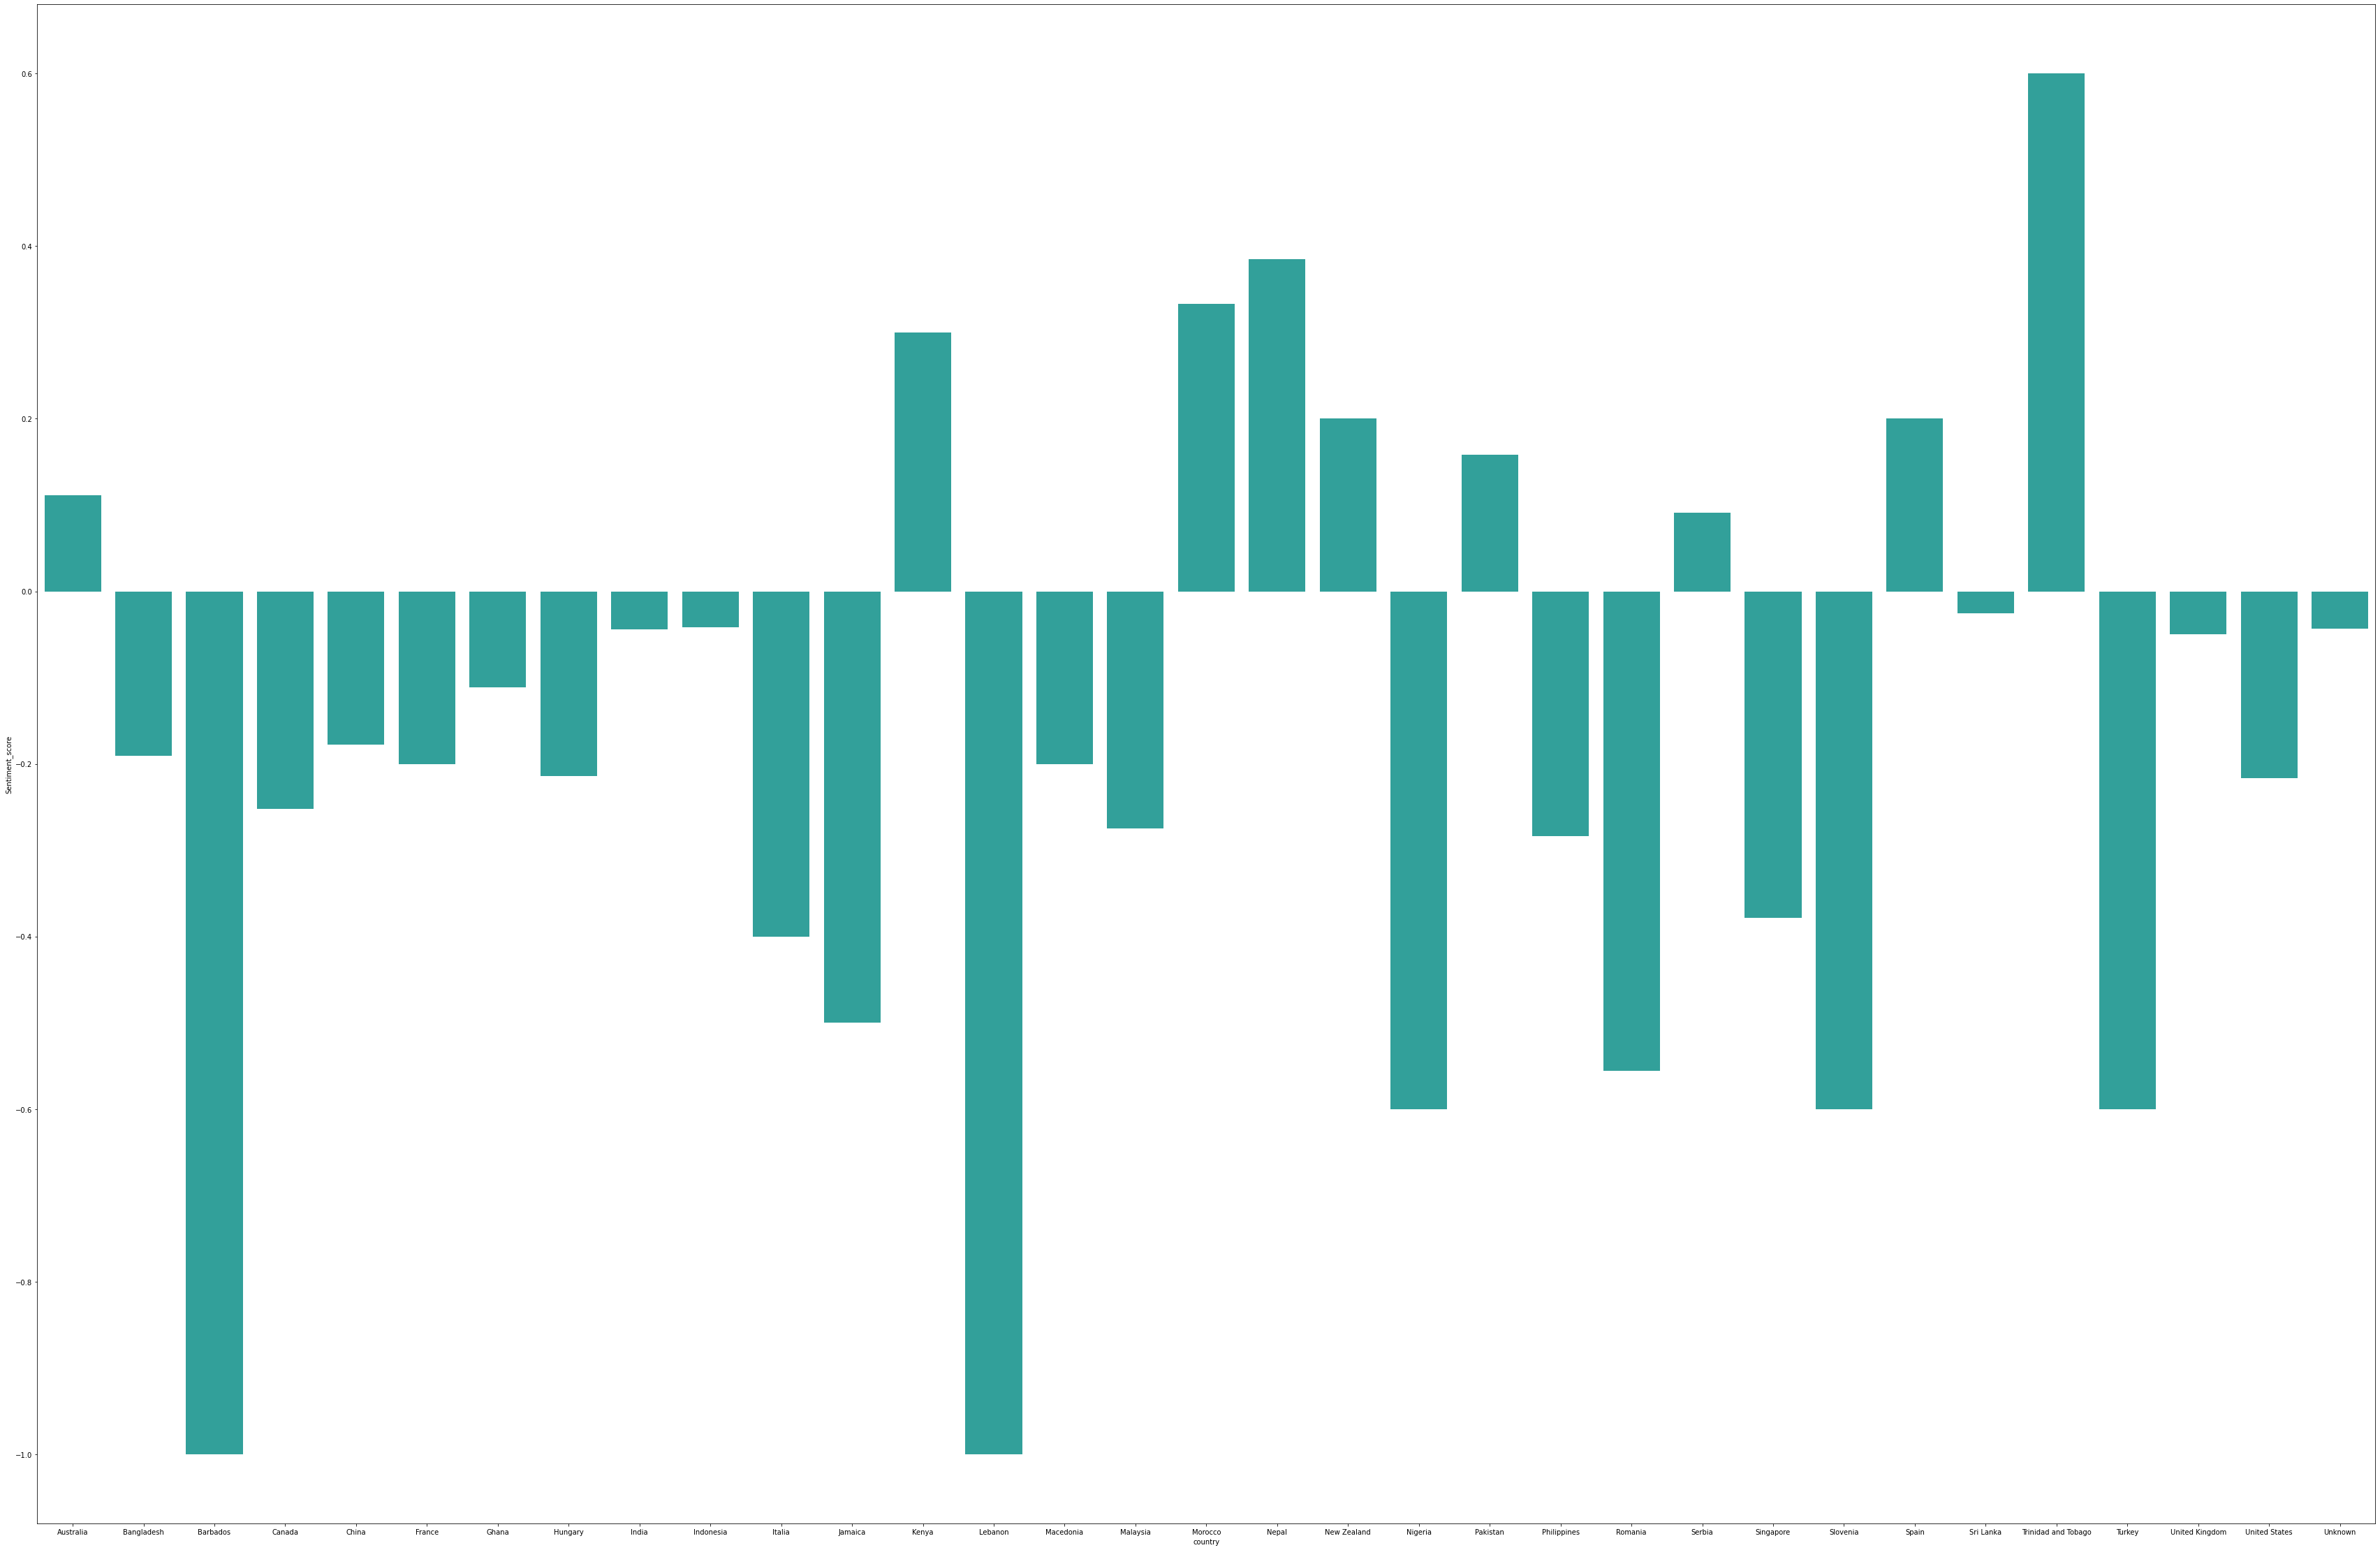

In [85]:
# Plot general sentiments
fig, ax = plt.subplots(figsize=(60,40))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax,
                 color="lightseagreen")